# CNN MODEL

In [2]:
import tensorflow as tf
import keras
import numpy as np
import os


In [3]:
directory = os.path.join('data')

In [32]:
directory

'data'

In [26]:
training_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode="binary",
    shuffle=False
)
validation_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode="binary",
    shuffle=False
)




Found 161 files belonging to 2 classes.
Found 161 files belonging to 2 classes.


In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalize pixel values between 0 and 1
    tf.keras.layers.Conv2D(32, (7, 7), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7,7), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)  # Number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model using the training dataset
history = model.fit(training_dataset, epochs=50)
print(history)





Epoch 1/50


KeyboardInterrupt: 

In [17]:
import tensorflow as tf
import keras
import numpy as np
import os

# Define the path to the image you want to predict
#Load and preprocess the image
import os
# Assuming you have already trained the model and have a trained_model
files = os.listdir("data/forged")
for file_path in files:
    img = tf.keras.preprocessing.image.load_img(os.path.join('data', 'genuine', file_path), target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values between 0 and 1
    # Make a prediction using the trained model
    predictions = model.predict(img_array)

    # Convert the prediction to a human-readable class name
    class_names = training_dataset.class_names
   
    predicted_class_index = np.argmax(predictions)
    print(predictions)
    predicted_class_name = class_names[predicted_class_index]
    if predicted_class_name == 'forged':
        print("predicted_class_name:", predicted_class_name)
        print(file_path)
        print ("====================")
    # Print the prediction result

1/1 [==============================] - 0s 94ms/step
[[ 18.147558 -10.620282]]
predicted_class_name: forged
deepak_genuine (1).png
1/1 [==============================] - 0s 144ms/step
[[ 18.145899 -10.620034]]
predicted_class_name: forged
deepak_genuine (10).png
1/1 [==============================] - 0s 72ms/step
[[ 18.14798  -10.621398]]
predicted_class_name: forged
deepak_genuine (11).png
1/1 [==============================] - 0s 105ms/step
[[ 18.145958 -10.6196  ]]
predicted_class_name: forged
deepak_genuine (12).png
1/1 [==============================] - 0s 102ms/step
[[ 18.144966 -10.619313]]
predicted_class_name: forged
deepak_genuine (13).png
1/1 [==============================] - 0s 87ms/step
[[ 18.147158 -10.621049]]
predicted_class_name: forged
deepak_genuine (14).png
1/1 [==============================] - 0s 59ms/step
[[ 18.1507  -10.62253]]
predicted_class_name: forged
deepak_genuine (15).png
1/1 [==============================] - 0s 51ms/step
[[ 18.143047 -10.61877 ]]
predi

# Transfer Learning For CNN model


In [28]:
# base_model = tf.keras.applications.MobileNetV2(input_shape=(256, 256, 3),
#                                                include_top=False,
#                                                weights='imagenet') ## 97.3% accuracy

from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(256, 256, 3))  ## 97.6% but it's baised towards forged class
# from tensorflow.keras.applications import VGG16

# base_model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
# from tensorflow.keras.applications import ResNet50

# base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3))




In [29]:
for layer in base_model.layers:
    layer.trainable = False



In [30]:
model = tf.keras.Sequential([
   
    base_model,  # Pre-trained base model
     # Pre-trained base model
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalize pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),  # Flatten the output of the convolutional layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])



In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_dataset, validation_data=validation_dataset, epochs=15)


Epoch 1/15


KeyboardInterrupt: 

1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



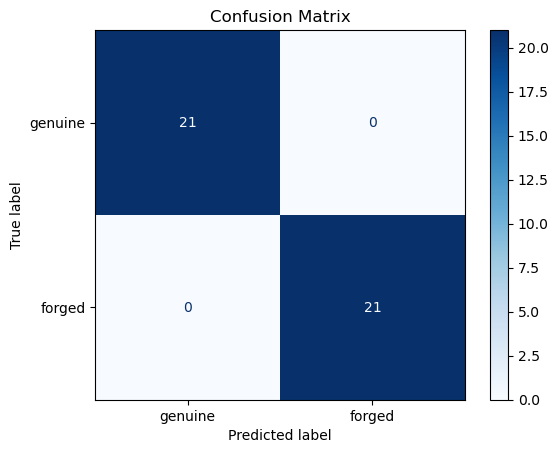

In [ ]:
#mobile net

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
y_true = []
y_pred = []

for images, labels in validation_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())  # Assuming labels are numpy arrays
    y_pred.extend(np.argmax(predictions, axis=1))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report for more details
print(classification_report(y_true, y_pred))

# Plot confusion matrix
labels = ["genuine", "forged"]  # Update with your class labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='.5g')  # Adjust the color map as needed
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 5s 5s/step
              precision    recall  f1-score   support

         0.0       0.53      0.89      0.66        80
         1.0       0.67      0.22      0.33        81

    accuracy                           0.55       161
   macro avg       0.60      0.55      0.50       161
weighted avg       0.60      0.55      0.50       161



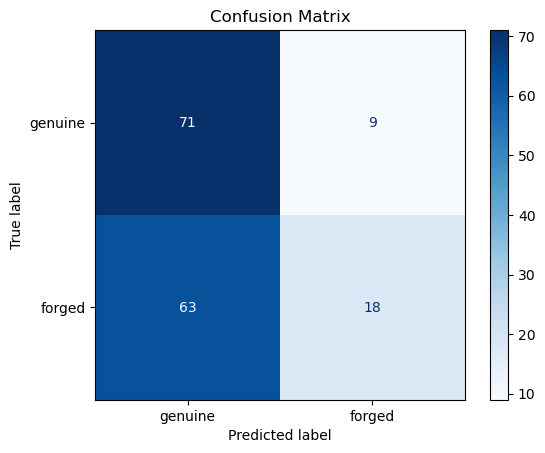

In [32]:
# efficient net

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
y_true = []
y_pred = []

for images, labels in validation_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())  # Assuming labels are numpy arrays
    y_pred.extend(np.argmax(predictions, axis=1))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report for more details
print(classification_report(y_true, y_pred))

# Plot confusion matrix
labels = ["genuine", "forged"]  # Update with your class labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='.5g')  # Adjust the color map as needed
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 2s 2s/step


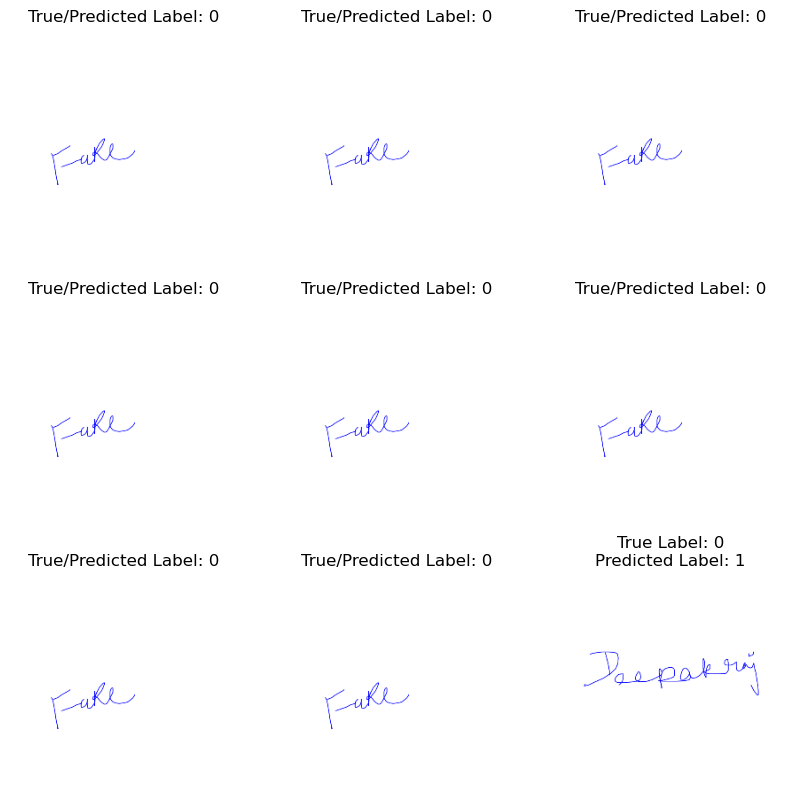

In [33]:
for images, labels in training_dataset.take(1):  # Take one batch of data
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Plot images with labels
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Plot first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i].numpy() == predicted_labels[i]:
            plt.title("True/Predicted Label: {}".format(int(labels[i])))
        else:
            plt.title("True Label: {}\nPredicted Label: {}".format(int(labels[i]), predicted_labels[i]))
        plt.axis("off")
    plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

genuine_dir = './data/genuine'
forged_dir = './data/forged'

genuine_images = os.listdir(genuine_dir)
genuine_images = [os.path.join(genuine_dir, img) for img in genuine_images]

# Load forged images
forged_images = os.listdir(forged_dir)
forged_images = [os.path.join(forged_dir, img) for img in forged_images]

# Function to predict and plot images
def predict_and_plot_images(image_paths, label):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths[:9]):  # Plot first 9 images
        img = load_img(img_path, target_size=(150, 150))  # Assuming you want to resize images to 150x150
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        prediction = model.predict(img_array)
        predicted_label = "Genuine" if prediction[0][0] > 0.5 else "Forged"  # Assuming binary classification
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img_array[0])
        plt.title("True Label: {}\nPredicted Label: {}".format(label, predicted_label))
        plt.axis("off")
    plt.show()

# Predict and plot genuine images
predict_and_plot_images(genuine_images, "Genuine")

# Predict and plot forged images
predict_and_plot_images(forged_images, "Forged")

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/flatten_1/Reshape' defined at (most recent call last):
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Deepak\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Deepak\AppData\Local\Temp\ipykernel_20108\425158109.py", line 33, in <module>
      predict_and_plot_images(genuine_images, "Genuine")
    File "C:\Users\Deepak\AppData\Local\Temp\ipykernel_20108\425158109.py", line 24, in predict_and_plot_images
      prediction = model.predict(img_array)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Deepak\anaconda3\envs\tensorflow-env\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential_1/flatten_1/Reshape'
Input to reshape is a tensor with 32 values, but the requested shape requires a multiple of 288
	 [[{{node sequential_1/flatten_1/Reshape}}]] [Op:__inference_predict_function_40435]

<Figure size 1000x1000 with 0 Axes>

In [20]:
import os
# Assuming you have already trained the model and have a trained_model
files = os.listdir("data/genuine")

for file_path in files:
    img = tf.keras.preprocessing.image.load_img(os.path.join("data/genuine", file_path), target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values between 0 and 1
    # Make a prediction using the trained model
    predictions = model.predict(img_array)

    # Convert the prediction to a human-readable class name
    class_names = training_dataset.class_names
   
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]
    print("predicted_class_name:", predicted_class_name)

       
    # Print the prediction result

1/1 [==============================] - 0s 172ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 139ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 152ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 160ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 148ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 160ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 155ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 156ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 155ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 163ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 148ms/step
predicted_class_name: forged
1/1 [==============================] - 0s 193ms/step
predicted_class_name: forged
1/1 [===========

# RNN MODEL 

In [1]:
#preprocessing dataset for RNN model

# finding maximum column length
import csv

input_file = 'datapoints.csv'  

max_row_size = 0

with open(input_file, 'r') as infile:
    reader = csv.reader(infile)
    
    for row in reader:
        row_size = len(row)
        max_row_size = max(max_row_size, row_size)

print(f'The maximum size: {max_row_size}')

The maximum size: 1667


In [3]:
# padding the data set to even the size of datapoints
import csv

input_file = 'datapoints.csv' 
output_file = 'padded_data.csv' 

max_expected_fields =max_row_size 

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
       
        num_fields = len(row)

        
        if num_fields < max_expected_fields:
            row += ['0'] * (max_expected_fields - num_fields)
            if(row[num_fields-1] == '1'):
                row[num_fields-1] = '0'
                row[len(row)-1] ='1'
           
        writer.writerow(row)

print(f'Padding completed. Padded data saved to {output_file}.')

Padding completed. Padded data saved to padded_data.csv.


In [4]:
# importing CSV file
import pandas as pd

In [5]:
#verification by printing all rows length

with open('padded_data.csv','r') as output_file:
    reader = csv.reader(output_file)
    for row in reader:
        print(len(row))

1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667


In [6]:
# Loading CSV file for RNN model

import pandas as pd

In [7]:
data = pd.read_csv("padded_data.csv",header=None)

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666
0,66.600006,405,69.600006,410,74.600006,418,82.600006,429,88.600006,441,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
1,73.800003,402,76.800003,409,80.800003,416,84.800003,423,87.800003,431,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
2,59.800003,336,60.800003,341,61.800003,347,63.800003,353,63.800003,361,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
3,64.600006,426,65.600006,429,66.600006,432,69.600006,438,70.600006,442,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
4,122.600006,423,126.600006,433,132.600006,448,136.600006,461,142.600006,476,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,104.600006,310,103.600006,322,103.600006,328,102.600006,335,101.600006,340,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
116,139.600006,290,139.600006,296,139.600006,307,138.600006,330,130.600006,354,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
117,143.600006,276,143.600006,277,143.600006,281,142.600006,291,136.600006,309,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
118,171.600006,281,170.600006,293,168.600006,308,166.600006,320,162.600006,332,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a list named data
# data should be of the form [x1, y1, ..., xn, yn, label]

# Split data into features and labels
# Extract features and labels
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

# Convert labels to binary encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Reshape features to be 3D (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert features to a 3D numpy array (samples, timesteps, features)
max_length = max(len(signature) for signature in features)
features_padded = tf.keras.preprocessing.sequence.pad_sequences(features, padding='post', maxlen=max_length)

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_onehot = tf.keras.utils.to_categorical(labels_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_padded, labels_onehot, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(max_length, 1)))
model.add(Dense(64,activation="relu"))  # You may experiment with other RNN layers
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Adjust the output dimension based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
3/3 [==============================] - 29s 4s/step - loss: 0.7081 - accuracy: 0.4271 - val_loss: 0.6819 - val_accuracy: 0.5833
Epoch 2/20
3/3 [==============================] - 9s 3s/step - loss: 0.6906 - accuracy: 0.5521 - val_loss: 0.6733 - val_accuracy: 0.5833
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.6848 - accuracy: 0.5521 - val_loss: 0.6673 - val_accuracy: 0.5833
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.6790 - accuracy: 0.5521 - val_loss: 0.6617 - val_accuracy: 0.5833
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.6748 - accuracy: 0.5521 - val_loss: 0.6561 - val_accuracy: 0.5833
Epoch 6/20
3/3 [==============================] - 9s 3s/step - loss: 0.6716 - accuracy: 0.5521 - val_loss: 0.6559 - val_accuracy: 0.5833
Epoch 7/20
3/3 [==============================] - 6s 3s/step - loss: 0.6677 - accuracy: 0.5521 - val_loss: 0.6507 - val_accuracy: 0.5417
Epoch 8/20
3/3 [========================

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              33792     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 46,338
Trainable params: 46,338
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("loss: ",loss,"== accuracy: ",accuracy)


1/1 [==============================] - 1s 606ms/step - loss: 0.5721 - accuracy: 0.6250
loss:  0.5720552802085876 == accuracy:  0.625


In [16]:
import csv

input_file = 'fak.csv' 
output_file = 'test_fake.csv' 

max_expected_fields =1667 

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
       
        num_fields = len(row)

        
        if num_fields < max_expected_fields:
            row += ['0'] * (max_expected_fields - num_fields)
            if(row[num_fields-1] == '1'):
                row[num_fields-1] = '0'
                row[len(row)-1] ='1'
           
        writer.writerow(row)

print(f'Padding completed. Padded data saved to {output_file}.')

Padding completed. Padded data saved to test_fake.csv.


In [24]:
import pandas as pd
import numpy as np
test_fake = pd.read_csv("test_fake.csv",header=None)
test_fake_input = test_fake.iloc[:, :-1].values
test_XX = np.expand_dims(X_train, axis=-1)
predictions = model.predict(test_XX)
predicted_labels = (predictions > 0.2).astype(int)
count_f,count_g = 0,0
# Print or use the predicted labels as needed
print(predicted_labels)
for i in predicted_labels:
    if(i[0] == 1):
        count_f +=1
    else:
        count_g +=1
print(count_f," ",count_g)

3/3 [==============================] - 1s 224ms/step
[[1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]]
73   13
